In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) #set default figure size
rng = np.random.default_rng() # random number generator

Two ways to simulate a GBM process:
\begin{align*}
dZ(t) = \mu Z(t) dt + \sigma Z(t) dB(t)
\end{align*}
1. Exact solution to the SDE
\begin{align*}
Z(t) = Z(0) \cdot \exp\left(\left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma B(t)\right)
\end{align*}

2. Approximate the GBM by a discretized version of the SDE (Euler-Maruyama method)
\begin{align*}
\Delta \tilde{Z}(t_i) = \tilde{Z}(t_{i-1}) \cdot \left[ \mu \Delta t + \sigma \Delta B \right] \\
\tilde{Z}(t_i) = \tilde{Z}(t_{i-1}) \cdot \left[1 + \mu \Delta t + \sigma \Delta B\right]
\end{align*} 

In [2]:
# Parameters
Z0 = 100  # initial value
mu = 0.1  # drift
sigma = 0.2  # volatility
T = 1  # time horizon

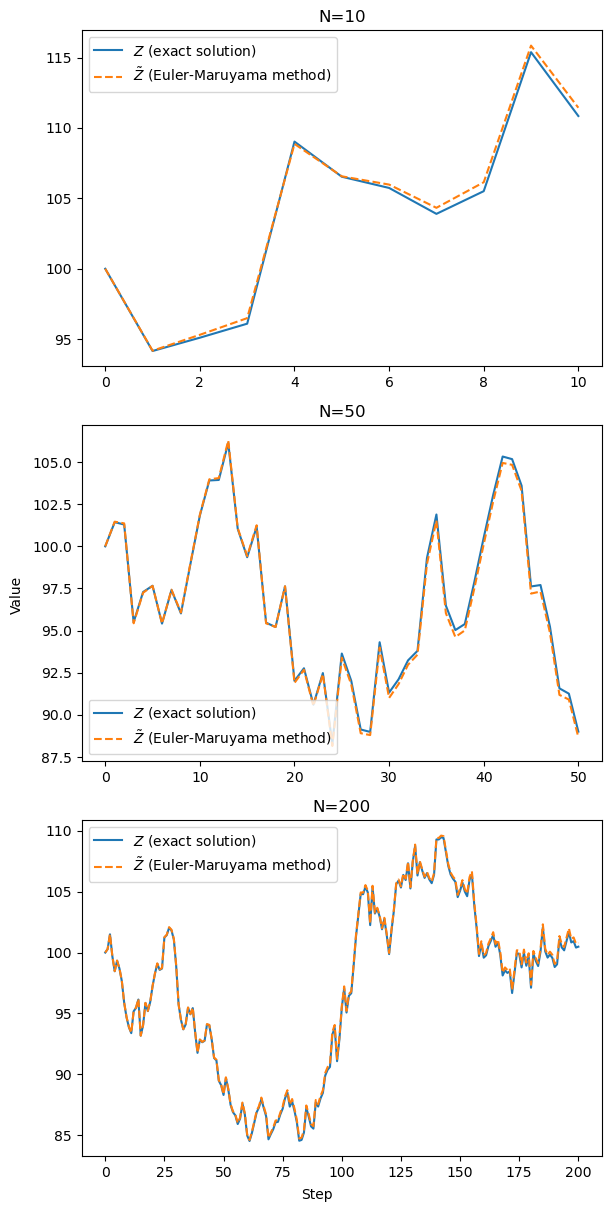

In [3]:
# Simulation for different N
fig, ax = plt.subplots(3, 1, figsize=(6, 12))
a = 0
for N in [10, 50, 200]:
    # Time step
    t = np.linspace(0, T, N + 1)
    dt = T / N

    # Brownian motion
    B = np.zeros(N + 1)
    B[0] = 0
    B[1:] = np.cumsum(np.sqrt(dt) * rng.standard_normal(N))

    # GBM (exact solution)
    Z = Z0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * B)

    # GBM (Euler-Maruyama method)
    Z_EM = np.zeros(N + 1)
    Z_EM[0] = Z0
    Z_EM[1:] = Z0 * np.cumprod(1 + mu * dt + sigma * np.diff(B))

    # plot
    ax[a].plot(Z, linestyle='-', color="C0", label=r"$Z$ (exact solution)")
    ax[a].plot(Z_EM, linestyle='--', color="C1", label=r"$\tilde{Z}$ (Euler-Maruyama method)")
    ax[a].set_title(f'N={N}')
    ax[a].legend()
    a += 1
# labels
fig.text(0.5, 0, 'Step', ha='center', va='center')
fig.text(0, 0.5, 'Value', ha='center', va='center', rotation='vertical')
fig.tight_layout()
plt.show()

As N becomes large, the difference between the exact solution and the Euler-Maruyama method becomes negligible.